In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Import the CSVs
industry_data = pd.read_csv('Industry_Portfolios.csv', header = 0, index_col = 0)
risk_factor_data = pd.read_csv('Risk_Factors.csv', header=0, index_col = 0)
industry = pd.DataFrame(list(industry_data),columns=['Industry_Name'])

       Sharpe Ratio
NoDur      0.231099
Durbl      0.072356
Manuf      0.166616
Enrgy      0.181708
HiTec      0.118552
Telcm      0.169064
Shops      0.191753
Hlth       0.172529
Utils      0.210948
Other      0.064693
AxesSubplot(0.125,0.125;0.775x0.755)


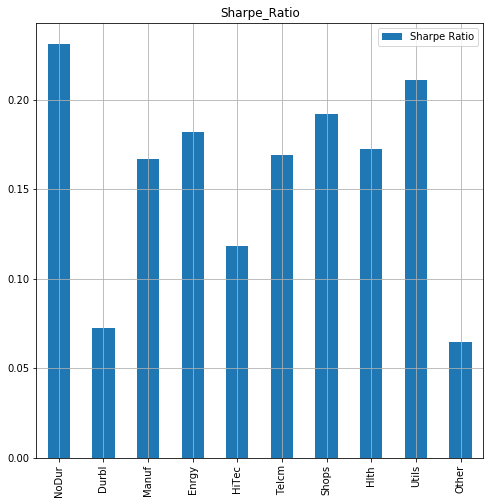

In [3]:
#Sharpe-Ratio

num = industry_data.sub(risk_factor_data.iloc[:,0], axis=0)
R_mean = pd.DataFrame([num[i].mean() for i in num],columns=['Mean Return'],index=industry_data.columns) 
R_std = pd.DataFrame([num[i].std() for i in num],columns=['STD'],index=industry_data.columns)
Sharpe_Ratio = pd.DataFrame(R_mean.iloc[:,0]/R_std.iloc[:,0],columns=["Sharpe Ratio"])
print(Sharpe_Ratio)
print(Sharpe_Ratio.iloc[:,0].plot(kind='bar',title='Sharpe_Ratio', figsize=(8,8),legend=True,grid=True))

       Sortino Ratio
NoDur       0.350804
Durbl       0.111967
Manuf       0.241260
Enrgy       0.273612
HiTec       0.170620
Telcm       0.244940
Shops       0.293032
Hlth        0.270294
Utils       0.290044
Other       0.087351
AxesSubplot(0.125,0.125;0.775x0.755)


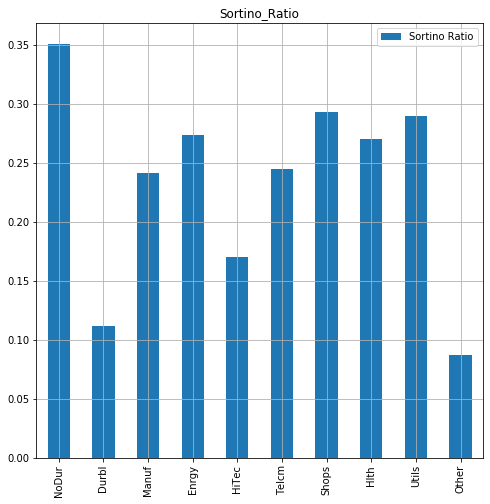

In [4]:
#Sortino Ratio

downside_risk = ((num[num<0].fillna(0))**2).mean()
Sortino_Ratio = pd.DataFrame(R_mean.iloc[:,0].to_numpy()/downside_risk**(1/2),columns=["Sortino Ratio"])
print(Sortino_Ratio)
print(Sortino_Ratio.iloc[:,0].plot(kind='bar',title='Sortino_Ratio', figsize=(8,8),legend=True,grid=True))

        Rm-Rf
Date         
200401   2.15
200402   1.40
200403  -1.32
200404  -1.83
200405   1.17
...       ...
201308  -2.69
201309   3.76
201310   4.17
201311   3.12
201312   2.81

[120 rows x 1 columns]
[[0.65374366]
 [1.64937419]
 [1.16792863]
 [0.96552727]
 [1.13238699]
 [0.9017213 ]
 [0.82951531]
 [0.67589035]
 [0.53700929]
 [1.20699238]]
[ 0.36971748 -0.41790314  0.16049431  0.50448515 -0.06402359  0.19434803
  0.27409258  0.23696807  0.4465234  -0.38750777]
       Jensen Alpha
NoDur      0.369717
Durbl     -0.417903
Manuf      0.160494
Enrgy      0.504485
HiTec     -0.064024
Telcm      0.194348
Shops      0.274093
Hlth       0.236968
Utils      0.446523
Other     -0.387508
AxesSubplot(0.125,0.125;0.775x0.755)


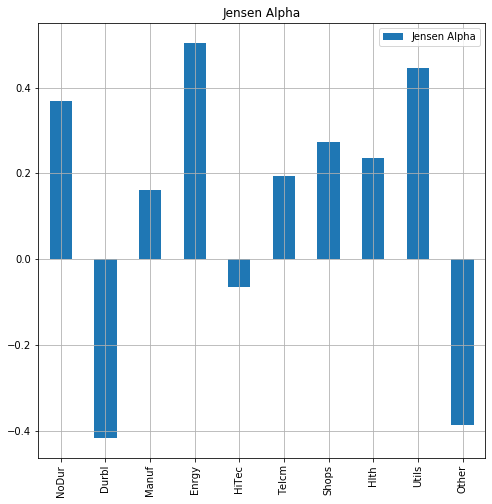

In [5]:
#Jensen's Alpha

Rm_Rf = pd.DataFrame(risk_factor_data.iloc[:,1])
x = pd.DataFrame([risk_factor_data.iloc[:,1].mean()]) 
Rm_Rf_mean = pd.DataFrame(np.repeat(x.values,10,axis=0),index=industry_data.columns,columns=['Mean Return'])
Ri_Rf = R_mean
model1 = LinearRegression()
model1.fit(Rm_Rf,num)
alpha=pd.DataFrame(Ri_Rf.sub(model1.coef_*Rm_Rf_mean,axis=1))
alpha.rename(columns = {'Mean Return':'Jensen Alpha'}, inplace = True)
print(Rm_Rf)
print(model1.coef_)
print(model1.intercept_)
print(alpha)
print(alpha.iloc[:,0].plot(kind='bar',title='Jensen Alpha', figsize=(8,8),legend=True,grid=True))

       Three-Factor Alpha
NoDur            0.386704
Durbl           -0.474342
Manuf            0.153285
Enrgy            0.523007
HiTec           -0.065979
Telcm            0.200724
Shops            0.255941
Hlth             0.257472
Utils            0.474411
Other           -0.404412
AxesSubplot(0.125,0.125;0.775x0.755)


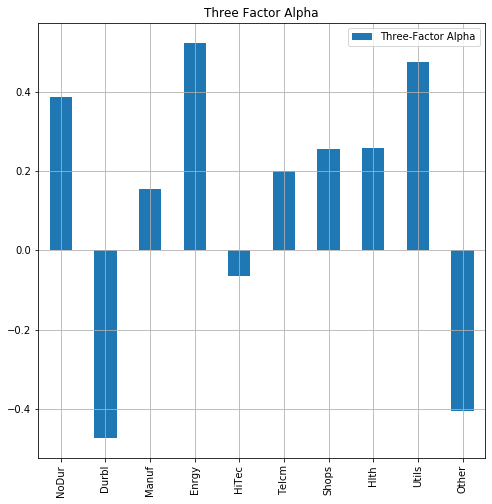

In [12]:
#Three Factor Alpha

model = LinearRegression().fit(risk_factor_data.iloc[:,1:],num)
three_factor_alpha=pd.DataFrame(model.intercept_,columns=['Three-Factor Alpha'],index=industry_data.columns)
print(three_factor_alpha)
print(three_factor_alpha.iloc[:,0].plot(kind='bar',title='Three Factor Alpha', figsize=(8,8),legend=True,grid=True))

In [12]:
pd.concat([Sharpe_Ratio, Sortino_Ratio, alpha, three_factor_alpha],axis=1)

,Sharpe Ratio,Sortino Ratio,Jensen Alpha,Three-Factor Alpha
NoDur,0.231099,0.350804,0.369717,0.461028
Durbl,0.072356,0.111967,-0.417903,-0.310372
Manuf,0.166616,0.241260,0.160494,-0.022423
Enrgy,0.181708,0.273612,0.504485,0.095252
HiTec,0.118552,0.170620,-0.064024,-0.231710
Telcm,0.169064,0.244940,0.194348,0.293189
Shops,0.191753,0.293032,0.274093,0.498218
Hlth,0.172529,0.270294,0.236968,0.499388
Utils,0.210948,0.290044,0.446523,0.319971
Other,0.064693,0.087351,-0.387508,-0.304590
